In [1]:
import matplotlib.pyplot as plt
import mudata; mudata.set_options(pull_on_update=False)
import muon as mu
import numpy as np
import sys; sys.path.append('../')
import torch
from functools import singledispatch, singledispatchmethod, wraps
from inspect import getcallargs
from scipy.spatial.distance import cdist
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split
from torch import nn
from torch.nn import functional as F
from torch.utils.data import Dataset, DataLoader
from torch_cluster import knn
from torch_geometric import nn as gnn
from torch_geometric.nn.conv import GCNConv, SimpleConv, SGConv
from tqdm import tqdm
from asterism.base import buildmethod, checkmethod, Asterism
from asterism.models.ntm import ATLAS, NTM, RSB
from asterism.utils import get_kwargs, kmeans, relabel, to_list
from asterism.utils.acts import Dirichlet
from asterism.utils.data import make_dataset
from asterism.utils.nets import ACT, NORM, OPTIM, Encoder, MLP, RNN
from asterism.utils.figs import show_comparison, show_dataset

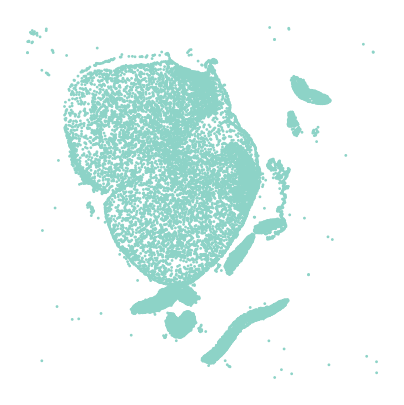

In [2]:
mdata = mu.read('spine.h5mu')
data = torch.tensor(mdata['protein'].X)
locs = torch.tensor(mdata['physical'].obsm['spatial'])
show_dataset(locs, size=1)

KMeans: 100%|██████████| 100/100 [00:32<00:00,  3.05it/s]


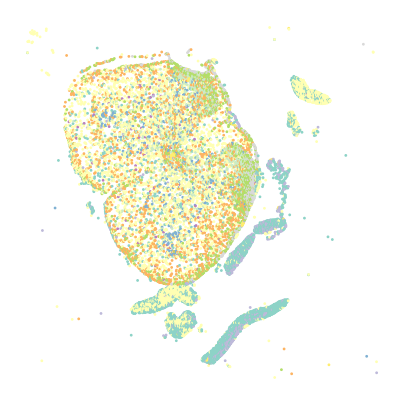

In [5]:
topics = kmeans(data, 10)
show_dataset(locs, topics, size=1)

NTM: 100%|██████████| 2000/2000 [01:01<00:00, 32.55it/s]


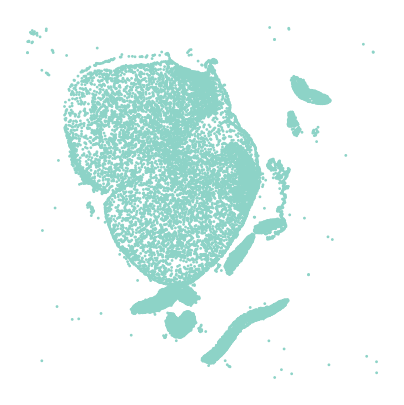

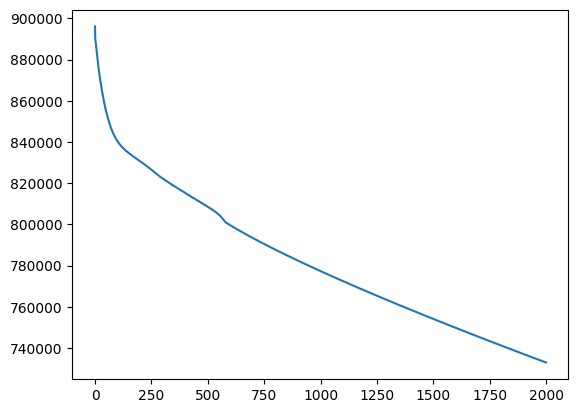

In [ ]:
# model = ATLAS(10, channels=(8, 4), doc_size=32, topic_rate=.001)
model = NTM()
topics = model.fit_predict(data, locs=locs, learning_rate=1e-2, n_steps=2000, batch_size=-1)
# print('\ntopics:', model.n_topics_)
show_dataset(locs, topics, size=1)
plt.plot(range(len(model.log_)), model.log_)
plt.show()
# plt.plot(range(len(model.topic_log_)), model.topic_log_)
# plt.show()


topics: 1


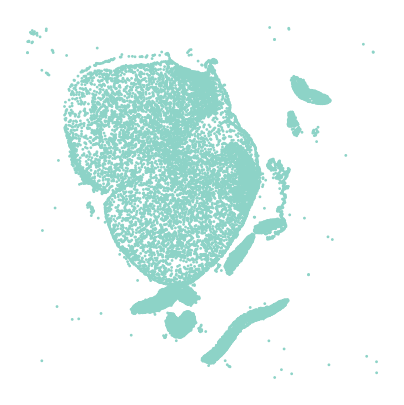

In [10]:
topics = model._g_model(model._encoder(data)).argmax(-1)
print('\ntopics:', topics.unique().shape[0])
show_dataset(locs, topics, size=1)